In [51]:
import pandas as pd
from Bio import SeqIO
from glob import glob

In [52]:
import glob
import pandas as pd
def append_deepsea_results():
    all_results = []
    for arquivo in glob.glob("/home/pedro/resultados_deepsea/*.tsv"):
        df = pd.read_csv(arquivo, sep="\t")
        all_results.append(df)
    combined_df = pd.concat(all_results, ignore_index=True)
    return combined_df

In [53]:
results = append_deepsea_results()
df = pd.DataFrame(results)

In [54]:
df

,Name,Class,Prob
0,MGYG000296065_00001,NonR,0.998609
1,MGYG000296065_00002,NonR,0.999620
2,MGYG000296065_00003,NonR,0.636586
3,MGYG000296065_00004,NonR,0.995158
4,MGYG000296065_00005,NonR,0.999488
...,...,...,...
63418,MGYG000296067_01525,NonR,0.936275
63419,MGYG000296067_01526,NonR,0.998999
63420,MGYG000296067_01527,NonR,0.946872
63421,MGYG000296067_01528,NonR,0.949882


In [55]:
df["genome"] = df["Name"].str.split("_").str[0]
df = df.rename(columns={"Name": "id"})

df = df.rename(columns={"Class": "class_deepsea", "Prob": "prob_deepsea", "genome": "genome_deepsea"})

In [56]:
df

,id,class_deepsea,prob_deepsea,genome_deepsea
0,MGYG000296065_00001,NonR,0.998609,MGYG000296065
1,MGYG000296065_00002,NonR,0.999620,MGYG000296065
2,MGYG000296065_00003,NonR,0.636586,MGYG000296065
3,MGYG000296065_00004,NonR,0.995158,MGYG000296065
4,MGYG000296065_00005,NonR,0.999488,MGYG000296065
...,...,...,...,...
63418,MGYG000296067_01525,NonR,0.936275,MGYG000296067
63419,MGYG000296067_01526,NonR,0.998999,MGYG000296067
63420,MGYG000296067_01527,NonR,0.946872,MGYG000296067
63421,MGYG000296067_01528,NonR,0.949882,MGYG000296067


In [57]:
# Juntando os resultados de todos os faa para posteriormente fazer o parseamento das infos importantes.
import os

def append_faa():
    lista_faa = []
    for arquivo in glob.glob("/home/pedro/antismash/cds/*.faa"):
        for seq_record in SeqIO.parse(arquivo, "fasta"):
            lista_faa.append({
                "id": seq_record.id,
                "sequence": str(seq_record.seq),
                "description": seq_record.description,
                "source_file": os.path.basename(arquivo)
            })
    return lista_faa

In [58]:
lista_faa = append_faa()
lista_faa_df = pd.DataFrame(lista_faa)
lista_faa_df = lista_faa_df.rename(columns={"description": "description_cds", "source_file": "source_file_cds"  })
lista_faa_df

,id,sequence,description_cds,source_file_cds
0,MGYG000296044_00001,MITIQPSIDFALFSTVEADCIISEKTEDILNAEYIDISICRDAACF...,MGYG000296044_00001 hypothetical protein,MGYG000296044.faa
1,MGYG000296044_00002,MTFSTKALLFASLMALSVGISSCSTSSSSGRLSGAGATFPAKIYTR...,MGYG000296044_00002 Phosphate-binding protein ...,MGYG000296044.faa
2,MGYG000296044_00003,MRRLLSALFAFTIFLAAPAWVMAADTAHGGQVFSNTCAVCHAGGGN...,MGYG000296044_00003 Cytochrome c6,MGYG000296044.faa
3,MGYG000296044_00004,MASLLKIRPLQRNDIPTVTQWARAEGFAPGVGDVSIYRHTDRQGLW...,MGYG000296044_00004 hypothetical protein,MGYG000296044.faa
4,MGYG000296044_00005,MSSDQEKLVSTDFWSEKPPWCQPWSILLTGIGLLAISWWCLHLLWF...,MGYG000296044_00005 hypothetical protein,MGYG000296044.faa
...,...,...,...,...
63418,MGYG000296065_05524,MELYGDERRSPIVARGEAKAMSETDLISADPVTVVISTKGWARAAK...,MGYG000296065_05524 DNA topoisomerase 4 subunit A,MGYG000296065.faa
63419,MGYG000296065_05525,MSIENVPVSVFSVVEGVKGDVSKNAQRKGLTLDFHYEYPIPEEVYG...,MGYG000296065_05525 Aerobic respiration contro...,MGYG000296065.faa
63420,MGYG000296065_05526,MKTYIITGATGGLGLSITRWLAKDLGNRIIIAVRDTYRGQTIATEL...,MGYG000296065_05526 hypothetical protein,MGYG000296065.faa
63421,MGYG000296065_05527,MLPKSNHLKPRKTPVQRRSAHTVDAIYEATIQVLLVQGAEKLTTTK...,MGYG000296065_05527 HTH-type transcriptional r...,MGYG000296065.faa


In [59]:
df_faa_com_deepsea = df.merge(lista_faa_df, on="id", how="inner")
df_faa_com_deepsea

,id,class_deepsea,prob_deepsea,genome_deepsea,sequence,description_cds,source_file_cds
0,MGYG000296065_00001,NonR,0.998609,MGYG000296065,MICCVRNPAWVMDSFESIYRKNPFDYSRMFNPGTRQTVYSRCESLI...,MGYG000296065_00001 hypothetical protein,MGYG000296065.faa
1,MGYG000296065_00002,NonR,0.999620,MGYG000296065,MSKHALNGIVAAMLPLGLTAASGQALGAYTYLGSRQNKSASAIVYN...,MGYG000296065_00002 hypothetical protein,MGYG000296065.faa
2,MGYG000296065_00003,NonR,0.636586,MGYG000296065,MEAAEKVDISSLSDRELACWAVQYGGWKYLHSTDQLCDPSGNLTIS...,MGYG000296065_00003 hypothetical protein,MGYG000296065.faa
3,MGYG000296065_00004,NonR,0.995158,MGYG000296065,MGVAGFGAAYWERRWKYIVIHHSAGASGNIGILQQVHRERQAKDPI...,MGYG000296065_00004 hypothetical protein,MGYG000296065.faa
4,MGYG000296065_00005,NonR,0.999488,MGYG000296065,MSTVRFVHAADIHLDSPLKGLEKYESAPVEKIREATREAFKNLIAF...,"MGYG000296065_00005 3',5'-cyclic adenosine mon...",MGYG000296065.faa
...,...,...,...,...,...,...,...
63418,MGYG000296067_01525,NonR,0.936275,MGYG000296067,MARQRNQLRITGGEFGSRRLHFPDAKGLRPTADRVRETLFNWLQGE...,MGYG000296067_01525 Ribosomal RNA small subuni...,MGYG000296067.faa
63419,MGYG000296067_01526,NonR,0.998999,MGYG000296067,MFADHPYGAPTEGTKASVDRINLVAIKAFHKKYYVAKNAVISIVGA...,MGYG000296067_01526 putative zinc protease,MGYG000296067.faa
63420,MGYG000296067_01527,NonR,0.946872,MGYG000296067,MIDTLGVQISDLTSDEREASGMPEGGAVIREVSPSSRLATVLKAGD...,MGYG000296067_01527 hypothetical protein,MGYG000296067.faa
63421,MGYG000296067_01528,NonR,0.949882,MGYG000296067,MLKLFYREGCHLCEDMVSMLHRGWPDRLNHLEWCDVDQNPQWKDEY...,MGYG000296067_01528 hypothetical protein,MGYG000296067.faa


In [60]:
proteinas_resistencia = df_faa_com_deepsea[df_faa_com_deepsea["class_deepsea"] != "NonR"]
proteinas_resistencia

,id,class_deepsea,prob_deepsea,genome_deepsea,sequence,description_cds,source_file_cds
206,MGYG000296065_00208,chloramphenicol,0.721123,MGYG000296065,MSLITEQKENIQIAMAKGAAWTTILRLSYRLIGVVSTIILARLLTP...,MGYG000296065_00208 hypothetical protein,MGYG000296065.faa
326,MGYG000296065_00331,chloramphenicol,0.709672,MGYG000296065,MASNPAIHGYCHPQFSEVRRLFMDNFIDSGEVGASVSLCMHGEPVV...,MGYG000296065_00331 hypothetical protein,MGYG000296065.faa
381,MGYG000296065_00387,aminoglycoside,0.469788,MGYG000296065,MQICIDIGLQADCSDALVKVLNIYYPLLPLEDNVQYSHQAIYAF,MGYG000296065_00387 hypothetical protein,MGYG000296065.faa
499,MGYG000296065_00509,chloramphenicol,0.973549,MGYG000296065,MHSFPSVFYCGFEKAAKANDIVLTLKLKSDVDLSVSWSAYKSLIYL...,MGYG000296065_00509 hypothetical protein,MGYG000296065.faa
712,MGYG000296065_00722,glycopeptide,0.888104,MGYG000296065,MRLLVVEDEIALQEQLKQALEKAGYSVDVASDGEEGLFLGREYSYD...,MGYG000296065_00722 Transcriptional regulatory...,MGYG000296065.faa
...,...,...,...,...,...,...,...
63088,MGYG000296067_01191,MLS,0.998380,MGYG000296067,MAQAEQQGEGERIAHLHAEMDHIGGYQARSRAAQLMAGLGFAPSDT...,MGYG000296067_01191 putative ABC transporter A...,MGYG000296067.faa
63121,MGYG000296067_01224,chloramphenicol,0.997725,MGYG000296067,MVRREFRQMESAWFSSEKLKLSKERVNRTGYFQKVNVATPTVPGQP...,MGYG000296067_01224 Outer membrane protein ass...,MGYG000296067.faa
63238,MGYG000296067_01343,chloramphenicol,0.771858,MGYG000296067,MKALITWVMKGRTQAIMATTVSGMLALMITPMALISAALVVLATLR...,MGYG000296067_01343 hypothetical protein,MGYG000296067.faa
63289,MGYG000296067_01394,chloramphenicol,0.452357,MGYG000296067,MRPGELLVADGDIELNQGRETVTLTVANNGDRPIQVGSHYHFYETN...,MGYG000296067_01394 Urease subunit beta,MGYG000296067.faa


In [61]:
proteinas_resistencia.value_counts("class_deepsea")

class_deepsea
chloramphenicol    341
glycopeptide       251
aminoglycoside     139
MLS                 99
beta-lactam         46
rifamycin           26
phosphonic acid     12
tetracycline         9
macrolide            1
Name: count, dtype: int64

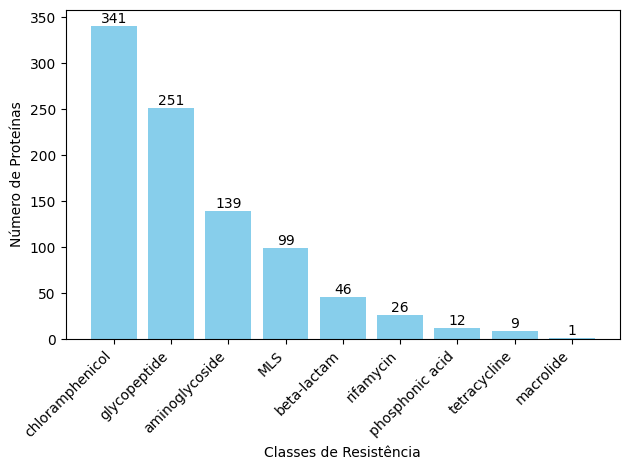

In [ ]:
# Imagem em barra com todas as classes de proteínas encontradas pelo DeepSea.

import matplotlib.pyplot as plt
count = proteinas_resistencia["class_deepsea"].value_counts()
bars = plt.bar(count.index, count.values, color="skyblue")
for bar in bars:
    tamanho = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, tamanho, str(tamanho), ha='center', va='bottom')
plt.xlabel("Classes de Resistência")
plt.ylabel("Número de Proteínas")
plt.title("Distribuição de Classes de Resistência nas Proteínas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

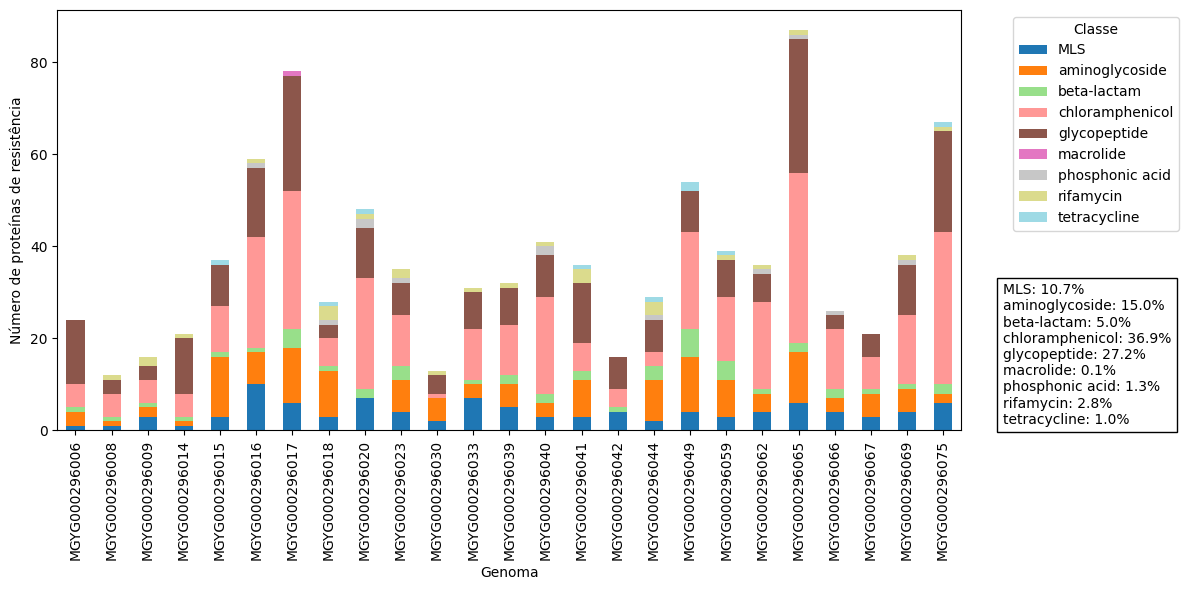

In [80]:
# Melhorar este gráfico aqui

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tabela = proteinas_resistencia.pivot_table(
    index="genome_deepsea", 
    columns="class_deepsea", 
    values="id",  
    aggfunc="count", 
    fill_value=0
)

total_por_classe = tabela.sum(axis=0)
total_geral = total_por_classe.sum()
percentual_classes = (total_por_classe / total_geral * 100).round(1)

tabela.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

#plt.title("Quantidade de proteínas de resistência por genoma e classe")
plt.xlabel("Genoma")
plt.ylabel("Número de proteínas de resistência")
plt.legend(title="Classe", bbox_to_anchor=(1.05, 1), loc="upper left")
texto_legenda = "\n".join([f"{classe}: {valor:.1f}%" for classe, valor in percentual_classes.items()])
plt.gcf().text(
    0.84, 0.4, texto_legenda, 
    fontsize=10, va='center', 
    bbox=dict(facecolor='white', edgecolor='black'),
)
plt.tight_layout()
#plt.xticks(rotation=45, ha='right')
plt.show()


In [64]:
tabela = pd.crosstab(proteinas_resistencia["genome_deepsea"], proteinas_resistencia["class_deepsea"])
porcentagem = tabela.div(tabela.sum(axis=1), axis=0) * 100
porcentagem


class_deepsea,MLS,aminoglycoside,beta-lactam,chloramphenicol,glycopeptide,macrolide,phosphonic acid,rifamycin,tetracycline
genome_deepsea,,,,,,,,,
MGYG000296006,4.166667,12.500000,4.166667,20.833333,58.333333,0.000000,0.000000,0.000000,0.000000
MGYG000296008,8.333333,8.333333,8.333333,41.666667,25.000000,0.000000,0.000000,8.333333,0.000000
MGYG000296009,18.750000,12.500000,6.250000,31.250000,18.750000,0.000000,0.000000,12.500000,0.000000
MGYG000296014,4.761905,4.761905,4.761905,23.809524,57.142857,0.000000,0.000000,4.761905,0.000000
MGYG000296015,8.108108,35.135135,2.702703,27.027027,24.324324,0.000000,0.000000,0.000000,2.702703
MGYG000296016,16.949153,11.864407,1.694915,40.677966,25.423729,0.000000,1.694915,1.694915,0.000000
MGYG000296017,7.692308,15.384615,5.128205,38.461538,32.051282,1.282051,0.000000,0.000000,0.000000
MGYG000296018,10.714286,35.714286,3.571429,21.428571,10.714286,0.000000,3.571429,10.714286,3.571429
MGYG000296020,14.583333,0.000000,4.166667,50.000000,22.916667,0.000000,4.166667,2.083333,2.083333


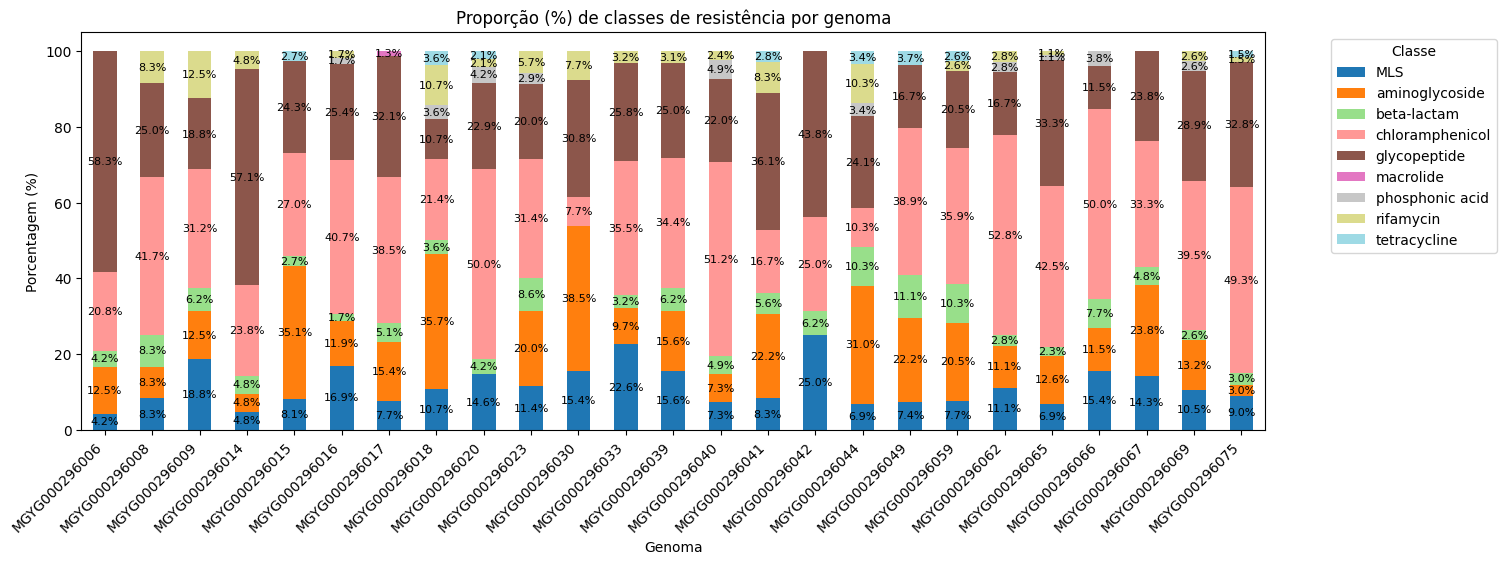

In [65]:
import numpy as np

ax = porcentagem.plot(kind="bar", stacked=True, figsize=(15,6), colormap="tab20")

for i, genome in enumerate(porcentagem.index):
    cumulative = 0
    for classe in porcentagem.columns:
        valor = porcentagem.loc[genome, classe]
        if valor > 0:
            ax.text(
                i, 
                cumulative + valor/2, 
                f"{valor:.1f}%", 
                ha="center", 
                va="center", 
                fontsize=8, 
                color="black"
            )
        cumulative += valor

plt.title("Proporção (%) de classes de resistência por genoma")
plt.xlabel("Genoma")
plt.ylabel("Porcentagem (%)")
plt.legend(title="Classe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [66]:
# Quantidade total de proteínas de resistência encontradas pelo DeepSea
proteinas_resistencia

,id,class_deepsea,prob_deepsea,genome_deepsea,sequence,description_cds,source_file_cds
206,MGYG000296065_00208,chloramphenicol,0.721123,MGYG000296065,MSLITEQKENIQIAMAKGAAWTTILRLSYRLIGVVSTIILARLLTP...,MGYG000296065_00208 hypothetical protein,MGYG000296065.faa
326,MGYG000296065_00331,chloramphenicol,0.709672,MGYG000296065,MASNPAIHGYCHPQFSEVRRLFMDNFIDSGEVGASVSLCMHGEPVV...,MGYG000296065_00331 hypothetical protein,MGYG000296065.faa
381,MGYG000296065_00387,aminoglycoside,0.469788,MGYG000296065,MQICIDIGLQADCSDALVKVLNIYYPLLPLEDNVQYSHQAIYAF,MGYG000296065_00387 hypothetical protein,MGYG000296065.faa
499,MGYG000296065_00509,chloramphenicol,0.973549,MGYG000296065,MHSFPSVFYCGFEKAAKANDIVLTLKLKSDVDLSVSWSAYKSLIYL...,MGYG000296065_00509 hypothetical protein,MGYG000296065.faa
712,MGYG000296065_00722,glycopeptide,0.888104,MGYG000296065,MRLLVVEDEIALQEQLKQALEKAGYSVDVASDGEEGLFLGREYSYD...,MGYG000296065_00722 Transcriptional regulatory...,MGYG000296065.faa
...,...,...,...,...,...,...,...
63088,MGYG000296067_01191,MLS,0.998380,MGYG000296067,MAQAEQQGEGERIAHLHAEMDHIGGYQARSRAAQLMAGLGFAPSDT...,MGYG000296067_01191 putative ABC transporter A...,MGYG000296067.faa
63121,MGYG000296067_01224,chloramphenicol,0.997725,MGYG000296067,MVRREFRQMESAWFSSEKLKLSKERVNRTGYFQKVNVATPTVPGQP...,MGYG000296067_01224 Outer membrane protein ass...,MGYG000296067.faa
63238,MGYG000296067_01343,chloramphenicol,0.771858,MGYG000296067,MKALITWVMKGRTQAIMATTVSGMLALMITPMALISAALVVLATLR...,MGYG000296067_01343 hypothetical protein,MGYG000296067.faa
63289,MGYG000296067_01394,chloramphenicol,0.452357,MGYG000296067,MRPGELLVADGDIELNQGRETVTLTVANNGDRPIQVGSHYHFYETN...,MGYG000296067_01394 Urease subunit beta,MGYG000296067.faa


In [67]:
# Dataframe com todas as features (proteínas) de BGCs das amostras.
df_bgc_features = pd.read_csv("/home/pedro/antismash/scripts_python/df_features_metadata (1).csv")

# Arrumando a coluna para posterior concat dos dataframes.
df_bgc_features["translation"] = df_bgc_features["translation"].str.replace(r"^\['|'\]$", "", regex=True)
df_bgc_features = df_bgc_features.rename(columns={"translation": "sequence"})

In [68]:
df_bgc_features

,record_id,feature_type,location,candidate_cluster_numbers,contig_edge,product,region_number,rules,tool,candidate_cluster_number,...,num-proteins,eggnog-coverage,ipr-coverage,taxon-lineage,num-genomes-total,pangenome-size,pangenome-core-size,pangenome-accessory-size,last-update,first-created
0,MGYG000296006_71,region,[0:6108](+),['1'],['True'],['RiPP-like'],['1'],['(strepbact or Antimicrobial14 or Bacteriocin...,['antismash'],NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
1,MGYG000296006_71,cand_cluster,[0:6108](+),NaN,['True'],['RiPP-like'],NaN,NaN,['antismash'],['1'],...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
2,MGYG000296006_71,protocluster,[0:6108](+),NaN,['True'],['RiPP-like'],NaN,NaN,['antismash'],NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
3,MGYG000296006_71,proto_core,[2226:3084](+),NaN,NaN,['RiPP-like'],NaN,NaN,['antismash'],NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
4,MGYG000296006_71,CDS,[539:1409](+),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,MGYG000296016_498,proto_core,[0:750](-),NaN,NaN,['terpene'],NaN,NaN,['antismash'],NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959
3546,MGYG000296016_498,CDS,[0:750](-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959
3547,MGYG000296016_498,CDS,[797:2069](+),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959
3548,MGYG000296016_498,aSDomain,[884:2066](+),NaN,NaN,NaN,NaN,NaN,['antismash'],NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959


In [69]:
# Preencher valores nulos em 'product' com o primeiro valor não nulo do mesmo 'record_id'
df_bgc_features["product"] = df_bgc_features.groupby("record_id")["product"].transform(lambda x: x.ffill().bfill())
df_bgc_features

,record_id,feature_type,location,candidate_cluster_numbers,contig_edge,product,region_number,rules,tool,candidate_cluster_number,...,num-proteins,eggnog-coverage,ipr-coverage,taxon-lineage,num-genomes-total,pangenome-size,pangenome-core-size,pangenome-accessory-size,last-update,first-created
0,MGYG000296006_71,region,[0:6108](+),['1'],['True'],['RiPP-like'],['1'],['(strepbact or Antimicrobial14 or Bacteriocin...,['antismash'],NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
1,MGYG000296006_71,cand_cluster,[0:6108](+),NaN,['True'],['RiPP-like'],NaN,NaN,['antismash'],['1'],...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
2,MGYG000296006_71,protocluster,[0:6108](+),NaN,['True'],['RiPP-like'],NaN,NaN,['antismash'],NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
3,MGYG000296006_71,proto_core,[2226:3084](+),NaN,NaN,['RiPP-like'],NaN,NaN,['antismash'],NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
4,MGYG000296006_71,CDS,[539:1409](+),NaN,NaN,['RiPP-like'],NaN,NaN,NaN,NaN,...,1798,89.54,87.71,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,1,NaN,NaN,NaN,2024-05-12T18:50:55.808707,2024-05-12T18:50:55.805930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,MGYG000296016_498,proto_core,[0:750](-),NaN,NaN,['terpene'],NaN,NaN,['antismash'],NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959
3546,MGYG000296016_498,CDS,[0:750](-),NaN,NaN,['terpene'],NaN,NaN,NaN,NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959
3547,MGYG000296016_498,CDS,[797:2069](+),NaN,NaN,['terpene'],NaN,NaN,NaN,NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959
3548,MGYG000296016_498,aSDomain,[884:2066](+),NaN,NaN,['terpene'],NaN,NaN,['antismash'],NaN,...,4797,84.74,81.55,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,NaN,NaN,NaN,2024-05-12T21:27:44.354582,2024-05-12T21:27:44.351959


In [70]:
df_bgc_proteinas_resistencia = df_bgc_features.merge(proteinas_resistencia, on="sequence", how="inner")
df_bgc_proteinas_resistencia

,record_id,feature_type,location,candidate_cluster_numbers,contig_edge,product,region_number,rules,tool,candidate_cluster_number,...,pangenome-core-size,pangenome-accessory-size,last-update,first-created,id_y,class_deepsea,prob_deepsea,genome_deepsea,description_cds,source_file_cds
0,MGYG000296049_28,CDS,[2103:2772](-),NaN,NaN,['terpene-precursor'],NaN,NaN,NaN,NaN,...,2703.0,93.0,2024-05-12T18:16:27.799845,2024-05-12T18:16:27.796393,MGYG000296049_00478,chloramphenicol,0.941029,MGYG000296049,MGYG000296049_00478 HTH-type transcriptional r...,MGYG000296049.faa
1,MGYG000296049_28,CDS,[8010:8712](+),NaN,NaN,['terpene-precursor'],NaN,NaN,NaN,NaN,...,2703.0,93.0,2024-05-12T18:16:27.799845,2024-05-12T18:16:27.796393,MGYG000296049_00485,glycopeptide,1.000000,MGYG000296049,MGYG000296049_00485 Transcriptional regulatory...,MGYG000296049.faa
2,MGYG000296033_3,CDS,[5504:6119](+),NaN,NaN,['terpene'],NaN,NaN,NaN,NaN,...,NaN,NaN,2024-05-12T20:34:36.056709,2024-05-12T20:34:36.054057,MGYG000296033_00219,chloramphenicol,0.399595,MGYG000296033,MGYG000296033_00219 Riboflavin synthase,MGYG000296033.faa
3,MGYG000296039_18,CDS,[5000:5900](-),NaN,NaN,['RiPP-like'],NaN,NaN,NaN,NaN,...,NaN,NaN,2024-05-12T19:20:07.230909,2024-05-12T19:20:07.228086,MGYG000296039_02250,chloramphenicol,0.956045,MGYG000296039,MGYG000296039_02250 hypothetical protein,MGYG000296039.faa
4,MGYG000296040_1,CDS,[5596:6274](-),NaN,NaN,['terpene'],NaN,NaN,NaN,NaN,...,895.0,1476.0,2024-05-12T21:27:41.645719,2024-05-12T21:27:41.643351,MGYG000296040_00007,glycopeptide,0.999955,MGYG000296040,MGYG000296040_00007 Transcriptional regulatory...,MGYG000296040.faa
5,MGYG000296015_33,CDS,[12463:14374](+),NaN,NaN,['terpene-precursor'],NaN,NaN,NaN,NaN,...,2511.0,0.0,2024-05-13T01:49:45.272822,2024-05-13T01:49:45.266713,MGYG000296015_01990,MLS,1.000000,MGYG000296015,MGYG000296015_01990 ABC transporter ATP-bindin...,MGYG000296015.faa
6,MGYG000296075_4,CDS,[14287:14986](-),NaN,NaN,['RRE-containing'],NaN,NaN,NaN,NaN,...,NaN,NaN,2024-05-12T17:42:38.080881,2024-05-12T17:42:38.078180,MGYG000296075_01755,glycopeptide,0.999844,MGYG000296075,MGYG000296075_01755 Alkaline phosphatase synth...,MGYG000296075.faa
7,MGYG000296067_1,CDS,[4321:5107](-),NaN,NaN,['terpene'],NaN,NaN,NaN,NaN,...,1087.0,472.0,2024-05-13T00:10:24.942616,2024-05-13T00:10:24.939791,MGYG000296067_00033,MLS,0.965278,MGYG000296067,MGYG000296067_00033 Ribosomal RNA small subuni...,MGYG000296067.faa
8,MGYG000296065_278,CDS,[1687:1837](-),NaN,NaN,['ectoine'],NaN,NaN,NaN,NaN,...,NaN,NaN,2024-05-13T01:03:33.931011,2024-05-13T01:03:33.927140,MGYG000296065_05380,phosphonic acid,0.509533,MGYG000296065,MGYG000296065_05380 hypothetical protein,MGYG000296065.faa
9,MGYG000296065_23,CDS,[41275:41719](-),NaN,NaN,['NRPS'],NaN,NaN,NaN,NaN,...,NaN,NaN,2024-05-13T01:03:33.931011,2024-05-13T01:03:33.927140,MGYG000296065_01334,rifamycin,0.781442,MGYG000296065,MGYG000296065_01334 hypothetical protein,MGYG000296065.faa


In [71]:
df_bgc_proteinas_resistencia = df_bgc_proteinas_resistencia.dropna(axis=1, how='all')
df_bgc_proteinas_resistencia.shape
df_bgc_proteinas_resistencia

,record_id,feature_type,location,product,locus_tag,transl_table,sequence,gene_functions,gene_kind,sec_met_domain,...,pangenome-core-size,pangenome-accessory-size,last-update,first-created,id_y,class_deepsea,prob_deepsea,genome_deepsea,description_cds,source_file_cds
0,MGYG000296049_28,CDS,[2103:2772](-),['terpene-precursor'],['ctg28_4'],['11'],MTLIRPKSLCDLALEHLRQQIIDGTLKMGQMLSERGISDELGVSKS...,['regulatory (smcogs) SMCOG1071: GntR family t...,['regulatory'],NaN,...,2703.0,93.0,2024-05-12T18:16:27.799845,2024-05-12T18:16:27.796393,MGYG000296049_00478,chloramphenicol,0.941029,MGYG000296049,MGYG000296049_00478 HTH-type transcriptional r...,MGYG000296049.faa
1,MGYG000296049_28,CDS,[8010:8712](+),['terpene-precursor'],['ctg28_11'],['11'],MSDPDAHLLIVDDDERIRELLKKFLMRSGFLVTGARDAAHARRVLS...,['regulatory (smcogs) SMCOG1008: response regu...,['regulatory'],NaN,...,2703.0,93.0,2024-05-12T18:16:27.799845,2024-05-12T18:16:27.796393,MGYG000296049_00485,glycopeptide,1.000000,MGYG000296049,MGYG000296049_00485 Transcriptional regulatory...,MGYG000296049.faa
2,MGYG000296033_3,CDS,[5504:6119](+),['terpene'],['ctg3_39'],['11'],MFTGIIQDVGEIRDINHEEQQSHLVFETRLDMSHWQLGDSVAVDGC...,NaN,NaN,NaN,...,NaN,NaN,2024-05-12T20:34:36.056709,2024-05-12T20:34:36.054057,MGYG000296033_00219,chloramphenicol,0.399595,MGYG000296033,MGYG000296033_00219 Riboflavin synthase,MGYG000296033.faa
3,MGYG000296039_18,CDS,[5000:5900](-),['RiPP-like'],['ctg18_13'],['11'],MDAKQDMKNDDTRPFLGFGLGLRTEHYQHVIEHKPQVDWFEIISEN...,['biosynthetic (rule-based-clusters) RiPP-like...,['biosynthetic'],"['DUF692 (E-value: 8.3e-101, bitscore: 327.1, ...",...,NaN,NaN,2024-05-12T19:20:07.230909,2024-05-12T19:20:07.228086,MGYG000296039_02250,chloramphenicol,0.956045,MGYG000296039,MGYG000296039_02250 hypothetical protein,MGYG000296039.faa
4,MGYG000296040_1,CDS,[5596:6274](-),['terpene'],['ctg1_7'],['11'],MLKILVIEDDRLTADYIAKGFKERQHCVDLAADGHEGLMLATGSEY...,['regulatory (smcogs) SMCOG1008: response regu...,['regulatory'],NaN,...,895.0,1476.0,2024-05-12T21:27:41.645719,2024-05-12T21:27:41.643351,MGYG000296040_00007,glycopeptide,0.999955,MGYG000296040,MGYG000296040_00007 Transcriptional regulatory...,MGYG000296040.faa
5,MGYG000296015_33,CDS,[12463:14374](+),['terpene-precursor'],['ctg33_10'],['11'],MLLTLRDIQLQIGAQTLIDGGTLTIEAGERVALIGRNGSGKSTLLR...,['transport (smcogs) SMCOG1000: ABC transporte...,['transport'],NaN,...,2511.0,0.0,2024-05-13T01:49:45.272822,2024-05-13T01:49:45.266713,MGYG000296015_01990,MLS,1.000000,MGYG000296015,MGYG000296015_01990 ABC transporter ATP-bindin...,MGYG000296015.faa
6,MGYG000296075_4,CDS,[14287:14986](-),['RRE-containing'],['ctg4_24'],['11'],MSENQFKVLLVDDELDILEFLSYNLEKEGYEVFTARNGAEAIKVAE...,['regulatory (smcogs) SMCOG1008: response regu...,['regulatory'],NaN,...,NaN,NaN,2024-05-12T17:42:38.080881,2024-05-12T17:42:38.078180,MGYG000296075_01755,glycopeptide,0.999844,MGYG000296075,MGYG000296075_01755 Alkaline phosphatase synth...,MGYG000296075.faa
7,MGYG000296067_1,CDS,[4321:5107](-),['terpene'],['ctg1_35'],['11'],MSHRAKKRFGQNFLHDASVIQRIVDVIDPHADDHMVEIGPGQAALT...,NaN,NaN,NaN,...,1087.0,472.0,2024-05-13T00:10:24.942616,2024-05-13T00:10:24.939791,MGYG000296067_00033,MLS,0.965278,MGYG000296067,MGYG000296067_00033 Ribosomal RNA small subuni...,MGYG000296067.faa
8,MGYG000296065_278,CDS,[1687:1837](-),['ectoine'],['ctg278_3'],['11'],MMAMLYLGLFQGINGDIARKITHLAFQNGPKAAQLIKMTSPDRERNHDC,NaN,NaN,NaN,...,NaN,NaN,2024-05-13T01:03:33.931011,2024-05-13T01:03:33.927140,MGYG000296065_05380,phosphonic acid,0.509533,MGYG000296065,MGYG000296065_05380 hypothetical protein,MGYG000296065.faa
9,MGYG000296065_23,CDS,[41275:41719](-),['NRPS'],['ctg23_14'],['11'],MKSALDKKNYQKWLVDKCIYEDCSLTIDLVCGMTSDEKQNIDLGGG...,NaN,NaN,NaN,...,NaN,NaN,2024-05-13T01:03:33.931011,2024-05-13T01:03:33.927140,MGYG000296065_01334,rifamycin,0.781442,MGYG000296065,MGYG000296065_01334 hypothetical protein,MGYG000296065.faa


In [72]:
df_filtrado = df_bgc_proteinas_resistencia[['record_id', 'genome_deepsea', 'product', 'class_deepsea', 'gene_kind']]
df_filtrado

,record_id,genome_deepsea,product,class_deepsea,gene_kind
0,MGYG000296049_28,MGYG000296049,['terpene-precursor'],chloramphenicol,['regulatory']
1,MGYG000296049_28,MGYG000296049,['terpene-precursor'],glycopeptide,['regulatory']
2,MGYG000296033_3,MGYG000296033,['terpene'],chloramphenicol,NaN
3,MGYG000296039_18,MGYG000296039,['RiPP-like'],chloramphenicol,['biosynthetic']
4,MGYG000296040_1,MGYG000296040,['terpene'],glycopeptide,['regulatory']
5,MGYG000296015_33,MGYG000296015,['terpene-precursor'],MLS,['transport']
6,MGYG000296075_4,MGYG000296075,['RRE-containing'],glycopeptide,['regulatory']
7,MGYG000296067_1,MGYG000296067,['terpene'],MLS,NaN
8,MGYG000296065_278,MGYG000296065,['ectoine'],phosphonic acid,NaN
9,MGYG000296065_23,MGYG000296065,['NRPS'],rifamycin,NaN


In [73]:
# Baixando o df_filtrado com os BGCs que tem proteínas de resistência

# df_filtrado.to_csv("BGCs_com_proteinas_de_resistencia.csv")

In [74]:
df_filtrado_2 = df_filtrado[["product", "class_deepsea"]]
df_filtrado_2

,product,class_deepsea
0,['terpene-precursor'],chloramphenicol
1,['terpene-precursor'],glycopeptide
2,['terpene'],chloramphenicol
3,['RiPP-like'],chloramphenicol
4,['terpene'],glycopeptide
5,['terpene-precursor'],MLS
6,['RRE-containing'],glycopeptide
7,['terpene'],MLS
8,['ectoine'],phosphonic acid
9,['NRPS'],rifamycin


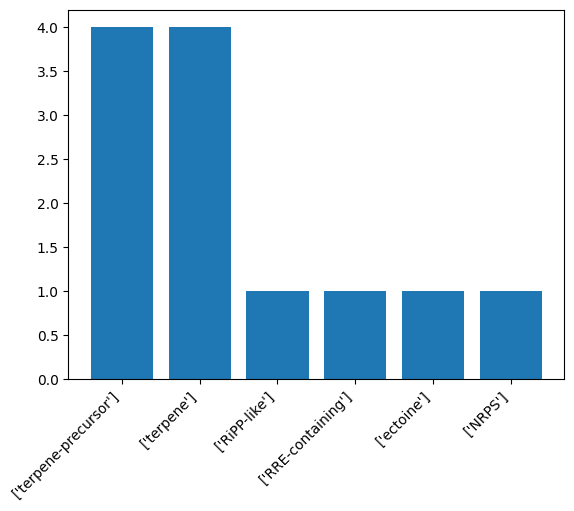

In [75]:
counts = df_filtrado['product'].value_counts()
g = plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, ha='right')
plt.show()

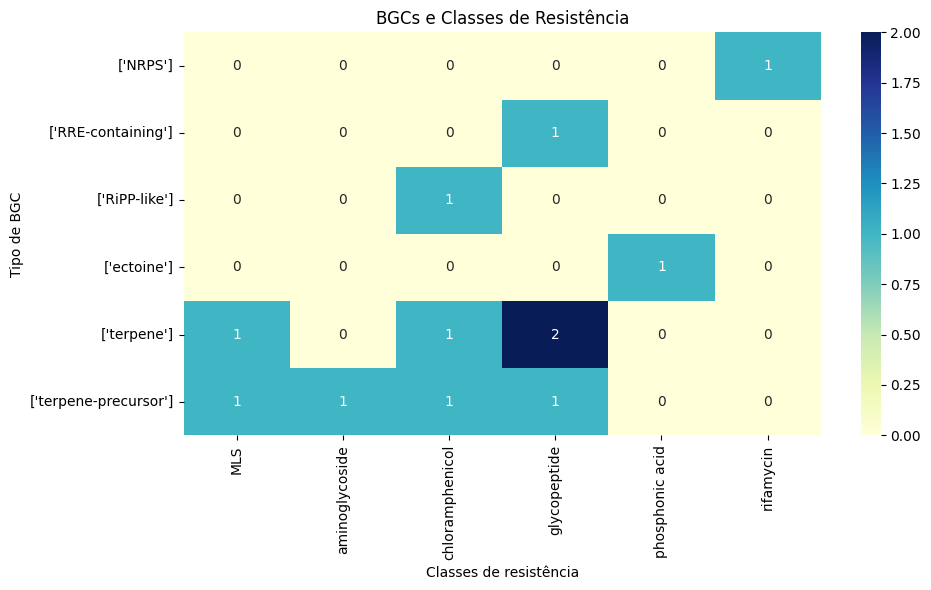

In [76]:
import seaborn as sns

tabela = df_filtrado.groupby(['product', 'class_deepsea']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(tabela, annot=True, cmap='YlGnBu')
plt.title('BGCs e Classes de Resistência')
plt.xlabel('Classes de resistência')
plt.ylabel('Tipo de BGC')
plt.tight_layout()
plt.show()


### 2. Caracterização da quantidade e dos tipos de BGCs

In [77]:
df_count = df_bgc_features["record_id"].value_counts()
df_count = pd.DataFrame(df_count)
df_count

,count
record_id,
MGYG000296065_8,204
MGYG000296065_48,166
MGYG000296065_23,147
MGYG000296065_72,96
MGYG000296039_1,88
...,...
MGYG000296065_189,10
MGYG000296017_11,9
MGYG000296049_664,8


In [78]:
df_count["record_id"]

KeyError: 'record_id'

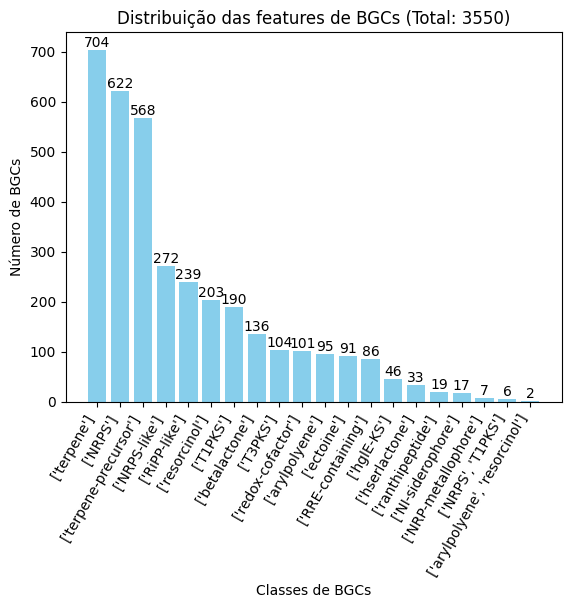

<Figure size 1000x600 with 0 Axes>

In [ ]:
counts = df_bgc_features["product"].value_counts().head(20)

bars = plt.bar(counts.index, counts.values, color="skyblue")
for bar in bars:
    tamanho = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, tamanho, str(tamanho), ha='center', va='bottom', )
plt.xlabel("Classes de BGCs")
plt.ylabel("Número de BGCs")
plt.title("Distribuição das features de BGCs (Total: 3550)")
plt.xticks(rotation=60, ha='right')
plt.figure(figsize=(10, 6))  
plt.tight_layout()
plt.show()

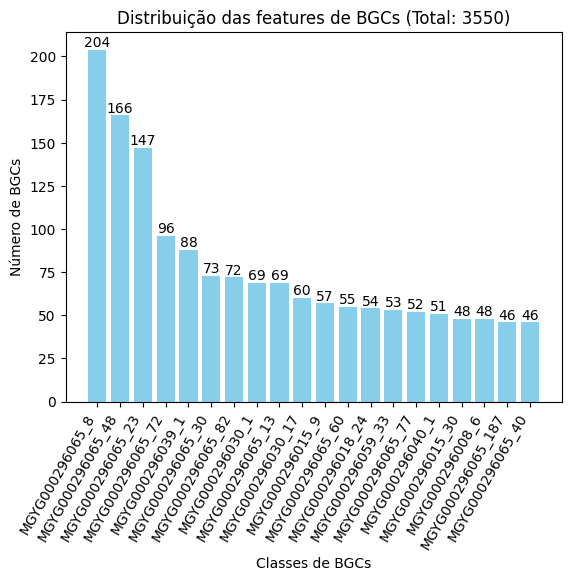

<Figure size 1000x600 with 0 Axes>

In [ ]:
counts = df_bgc_features["record_id"].value_counts().head(20)

bars = plt.bar(counts.index, counts.values, color="skyblue")
for bar in bars:
    tamanho = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, tamanho, str(tamanho), ha='center', va='bottom', )
plt.xlabel("Classes de BGCs")
plt.ylabel("Número de BGCs")
plt.title("Distribuição das features de BGCs (Total: 3550)")
plt.xticks(rotation=60, ha='right')
plt.figure(figsize=(10, 6))  
plt.tight_layout()
plt.show()

In [ ]:
# Análise exploratória dos BGCs que produzem antibióticos
print(df_bgc_features["product"].value_counts())
# Fazer um gráfico com esses resultados.

product
['terpene']                                           704
['NRPS']                                              622
['terpene-precursor']                                 568
['NRPS-like']                                         272
['RiPP-like']                                         239
['resorcinol']                                        203
['T1PKS']                                             190
['betalactone']                                       136
['T3PKS']                                             104
['redox-cofactor']                                    101
['arylpolyene']                                        95
['ectoine']                                            91
['RRE-containing']                                     86
['hglE-KS']                                            46
['hserlactone']                                        33
['ranthipeptide']                                      19
['NI-siderophore']                                     17
['NRP-

In [ ]:
df_bgc_features["record_id"].value_counts()

record_id
MGYG000296065_8      204
MGYG000296065_48     166
MGYG000296065_23     147
MGYG000296065_72      96
MGYG000296039_1       88
                    ... 
MGYG000296065_189     10
MGYG000296017_11       9
MGYG000296049_664      8
MGYG000296006_405      8
MGYG000296016_498      8
Name: count, Length: 102, dtype: int64